# Genomic Analysis of Aryl Hydrocarbon Receptor of Fish in Polluted and Reference Waters

## Import Libraries

In [ ]:
from os import listdir
from Bio import SeqIO
from Bio import AlignIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Open Sequence Directories

In [2]:
print("Reference populations\n", listdir(".\Clean"))
print("\n")
print("Polluted populations\n", listdir(".\Polluted"))

Reference populations
 ['Fundulus_heterclitus_maine.fasta', 'microgadus_tomcod_miramichi.fasta', 'Salmo_salar_refseq.fasta']


Polluted populations
 ['Fundulus_heteroclitus_superfund.fasta', 'Microgradis_tomcod_hudson_river.fasta', 'Salmo_salar_pcb.fasta']


## File Management

Merge FASTA files into one for alignment processing.

In [30]:
def merge_fastas_in_directory(dir, output_name):
    """
    Combines all fasta files in specified directory into one

    dir : directory that has fasta files to be combined
    output_name : name of file to be created/written with results
    """

    path = dir
    fasta_files = [f"{path}/{f}" for f in listdir(path) if f.endswith(".fasta")] # Get all files in the folder that end with .fasta
    merged_file = output_name # Output files
    records = [] # Collect all records

    for f in fasta_files:
        records.extend(list(SeqIO.parse(f, "fasta")))

    SeqIO.write(records, merged_file, "fasta")     # Write merged fasta
    print(f"Merged {len(records)} sequences into {merged_file}")

Creating five different merges for five different alignments and heatmaps.

In [22]:
merge_fastas_in_directory("./Polluted", "merged_polluted_sequences.fasta")
merge_fastas_in_directory("./Clean", "merged_reference_sequences.fasta")
merge_fastas_in_directory("./microgadus_tomcod", "merged_microgadus_tomcod.fasta")
merge_fastas_in_directory("./Fundulus_heteroclitus", "merged_fundulus_heteroclitus.fasta")
merge_fastas_in_directory("./Salmo_salar", "merged_salmo_salar.fasta")

Merged 3 sequences into merged_polluted_sequences.fasta
Merged 3 sequences into merged_reference_sequences.fasta
Merged 2 sequences into merged_microgadus_tomcod.fasta
Merged 2 sequences into merged_fundulus_heteroclitus.fasta
Merged 2 sequences into merged_salmo_salar.fasta


## Sequence Comparisons

#### MAFFT

MAFFT is a command line multiple sequence aligner from https://mafft.cbrc.jp/alignment/software/

The following is the general parameters used:

`cd {path}`

`mafft`

`{input}` Input file?

`{output}` Output file?

`3` Output format?

`3` Strategy?

`[Enter]` Additional arguments?

`[Enter]` Press enter to run

`[Enter]` Press enter to exit`

#### Heatmap Preparation 

Format the merged sequences into numbered dataframes for heatmap compatibility.

In [27]:
def create_alignned_heatmap(input, title):
    alignment = AlignIO.read(input, "fasta")

    # Create a dictionary: key = sequence ID, value = list of nucleotides
    data = {record.id: list(str(record.seq)) for record in alignment}
    df = pd.DataFrame(data).T  # transpose: each row = sequence, each column = position

    nt_map = {'A': 1, 'C': 2, 'G': 3, 'T': 4, '-': 0, 'N': 0}
    df_numeric = df.map(lambda x: nt_map.get(x.upper(), 0))
    df_numeric

    plt.figure(figsize=(15, len(df_numeric)/2))  # adjust figure size
    sns.heatmap(df_numeric, cmap="viridis", cbar=True, yticklabels=True)
    plt.xlabel("Alignment position")
    plt.ylabel("Sequence ID")
    plt.title(title)
    plt.show()

### Cross-Species Alignments

MSA of all selected species in polluted and reference waters.

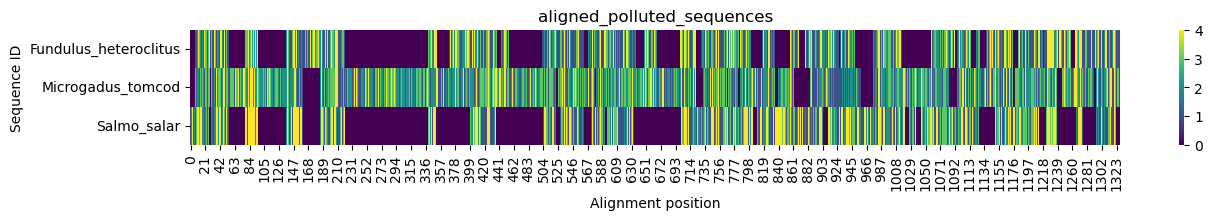

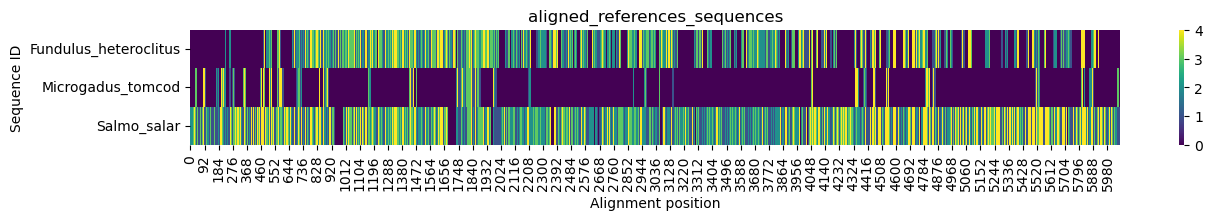

In [25]:
create_alignned_heatmap("aligned_polluted_sequences.fasta", "aligned_polluted_sequences")
create_alignned_heatmap("aligned_reference_sequences.fasta", "aligned_references_sequences")

### Species-Specific Alignments

MSA of individual species in polluted and reference waters for direct indel indentification.

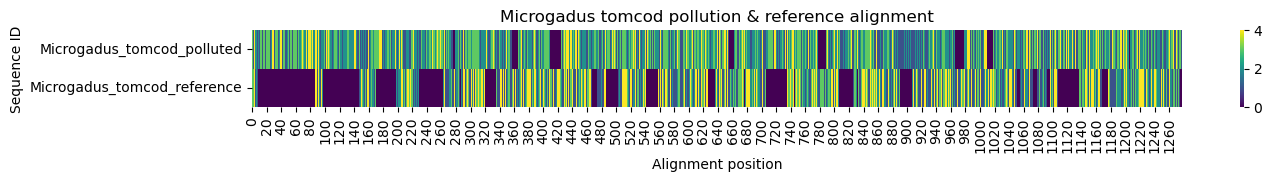

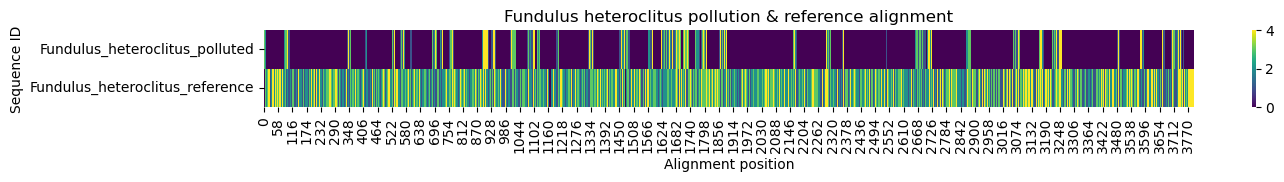

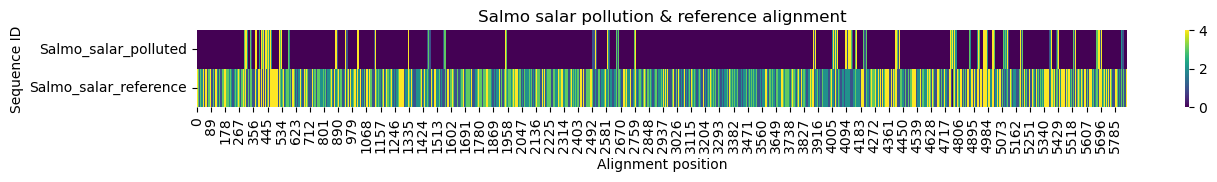

In [26]:
create_alignned_heatmap("aligned_microgadus_tomcod.fasta", "Microgadus tomcod pollution & reference alignment")
create_alignned_heatmap("aligned_fundulus_heteroclitus.fasta", "Fundulus heteroclitus pollution & reference alignment")
create_alignned_heatmap("aligned_salmo_salar.fasta", "Salmo salar pollution & reference alignment")